# SVM Method

Les machines à vecteurs de support (SVM) sont une classe de modèles d'apprentissage automatique utilisés pour la classification et la régression. SVM est particulièrement populaire pour la classification de données dans des espaces de grande dimension.

Le'objectif de la SVM est de trouver l'hyperplan qui sépare au mieux les données de différentes classes. 


## Utilisation de la méthide TF-IDF pour la véctprisation 

## Bibliotheques 

Nous nous somme basés sur essentielement sur la bibliotheque sklearn et matplotlib.pyplot.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, roc_auc_score, roc_curve 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from joblib import load
from sklearn.svm import SVC

## Utilisation de la méthodes TF-IDF pour générer les tableaux vectorisés

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('news/filtred_tokened_data.csv')

x_train, x_test, y_train, y_test = train_test_split(df['tokens'], df['label'], test_size=0.30, random_state=50)


tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# on vectorise x_train
tfidf_x_train=tfidf_vectorizer.fit_transform(x_train).toarray()

# on vectorise y_train
tfidf_x_test=tfidf_vectorizer.transform(x_test)



#cv = CountVectorizer()
#tfidf_x_train=cv.fit_transform(x_train)



In [3]:
print(tfidf_x_train.shape)
print(tfidf_x_test.shape[0])

print(y_train.shape)
print(y_train.shape[0])


(31428, 100047)
13470
(31428,)
31428


#  Evaluation de plusieurs filtres 

La méthode SVM de sklearn propose plusieurs noyeaux pour la fonction SVC

'linear' : Noyau linéaire (SVM linéaire).
'rbf' : Noyau gaussien radial (SVM à noyau gaussien).
'poly' : Noyau polynomial.
'sigmoid' : Noyau sigmoïde.

## 1- Noyau Linéaire

In [4]:
from sklearn.svm import LinearSVC
model = LinearSVC(dual=False,random_state=50)


# model = SVC(kernel='linear', C=0.1, random_state=50) # probleme la fonction rentre dans une boucle infinie!!!


In [5]:
#on entraine le model sur les données d'entrainement.
history = model.fit(tfidf_x_train,y_train)

In [6]:
#optention des prédictions de ce modèle.
y_pred=model.predict(tfidf_x_test)

#### Evaluation de la méthode 

In [7]:
model.score(tfidf_x_test, y_test)

0.9962138084632517

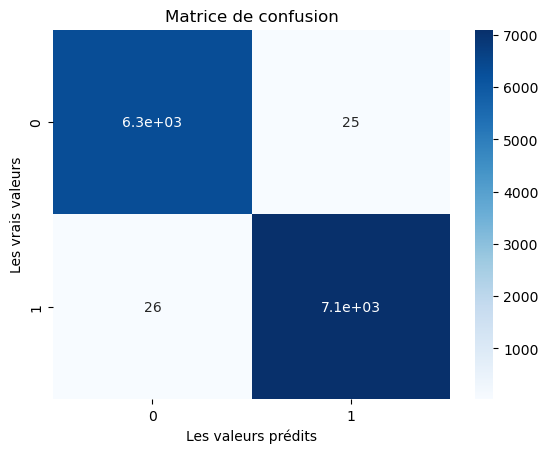

In [8]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()

## 2- Noyeau Gaussien Radial



In [9]:
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVR

model = SVC(kernel='rbf', random_state=50)

In [10]:
#on entraine le model sur les données d'entrainement.
history = model.fit(tfidf_x_train,y_train)



In [11]:
y_pred=model.predict(tfidf_x_test)


In [12]:
#### Evaluation de la méthode 

In [13]:
model.score(tfidf_x_test, y_test)

0.9962138084632517

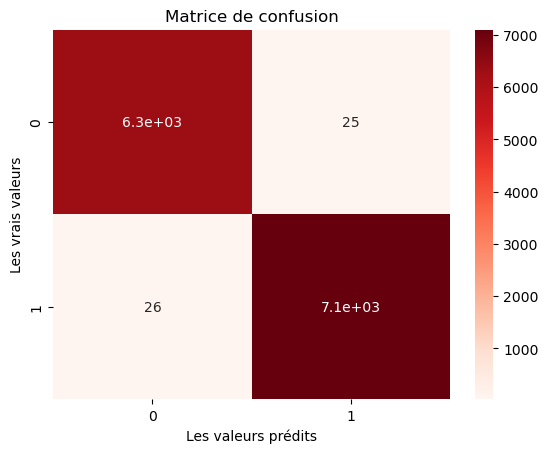

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6341
           1       1.00      1.00      1.00      7129

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [14]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Reds')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test, y_pred))

## 3- Noyeau Polynomianl

In [15]:
model = SVC(kernel='poly', C=0.1, random_state=50)


In [ ]:
model.fit(tfidf_x_train,y_train)

In [ ]:
y_pred=model.predict(tfidf_x_test)

In [ ]:
model.score(tfidf_x_test, y_test)

In [ ]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Greys')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test, y_pred))

## 4- Noyeau Sigmoid

In [ ]:
model = SVC(kernel='sigmoid', C=0.1, random_state=50)

In [ ]:
y_pred=model.predict(tfidf_x_test)

In [ ]:
model.score(tfidf_x_test, y_test)

In [ ]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Greens')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test, y_pred))